# Test multi-modal 1D
---
Description:

- Optimization (max)
- Multimodal (yes)
---

The equations is given by:

$f\left(x\right) = \sin(x)$ with $x \in [0, 4\pi]$

This function in that range has **2** maximum values at: i) $\sin(\frac{\pi}{2})=1$ and ii) $\sin(\frac{5\pi}{2})=1$.

## First we import python libraries and set up the directory

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

# Enable LaTex in plotting.
plt.rcParams["text.usetex"] = True

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

## Here we import all our custom PSO code

In [2]:
from star_pso.auxiliary.swarm import Swarm
from star_pso.auxiliary.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.auxiliary.utilities import cost_function

## Define the multimodal function

In [3]:
@cost_function
def fun_test1D(x: np.ndarray, **kwargs) -> float:
        
    # Compute the final value.
    f_value = np.sin(x).item()
    
    # Return the solution.
    return f_value
# _end_def_

## Here we set the PSO parameters

- Set the number of particles 'N'
- Setup the initial population
- Create the PSO object

In [4]:
# Random number generator.
rng = np.random.default_rng()

# Define the number of particles.
N = 100

# Draw random samples for the initial points.
X_t0 = rng.uniform(0.0, 4*np.pi, size=(N, 1))

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in X_t0])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm = swarm_t0, obj_func = fun_test1D,
                       x_min = 0.0, x_max = 4*np.pi)

## Optimization process

In [5]:
test_PSO.run(max_it = 1000,
             options = {"w0": 0.95, "c1": 1.05, "c2": 0.0, "fipso": False},
             reset_swarm = True, verbose = True, adapt_params = False)

Initial f_optimal = 1.0000
Iteration:     1 -> f_optimal = 0.9990
Iteration:   101 -> f_optimal = 1.0000
Iteration:   201 -> f_optimal = 1.0000
Iteration:   301 -> f_optimal = 1.0000
Iteration:   401 -> f_optimal = 1.0000
Iteration:   501 -> f_optimal = 1.0000
Iteration:   601 -> f_optimal = 1.0000
Iteration:   701 -> f_optimal = 1.0000
Iteration:   801 -> f_optimal = 1.0000
Iteration:   901 -> f_optimal = 1.0000
Final f_optimal = 1.0000
run: elapsed time = 1.279 seconds.


In [6]:
# Get the optimal solution from the PSO.
_, _, x_opt = test_PSO.get_optimal_values()

x_opt = x_opt.item()

# Compute the final objective functions.
f_opt = np.sin(x_opt)

# Print the resutls.
print(f"x={x_opt:.5f}, f(x) = {f_opt:.5f}")

x=1.57080, f(x) = 1.00000


In [11]:
best_n = []

for pt in test_PSO.swarm.best_n(N//2):
    best_n.append((pt.position.item(), pt.value))
    
best_n = np.unique(np.array(best_n), axis=0)

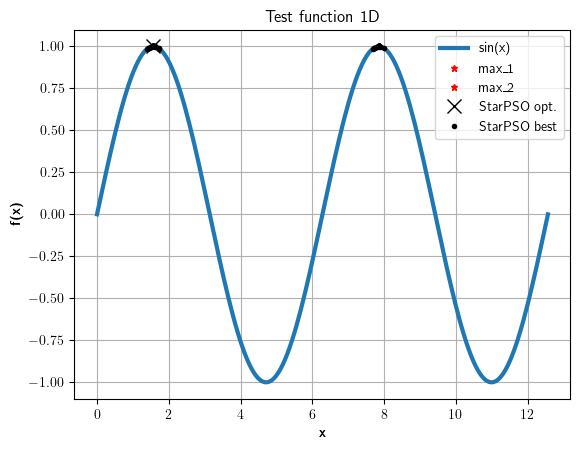

In [12]:
# Set a test range.
x_test = np.linspace(0.0, 4.0*np.pi, 200)
y_test = np.sin(x_test)

# Plot the test function.
plt.plot(x_test, y_test, '-', linewidth=3, label="sin(x)")

# Plot the maximum points.
plt.plot(0.5*np.pi, 1.0, 'r*', markersize=5, label="max_1")
plt.plot(2.5*np.pi, 1.0, 'r*', markersize=5, label="max_2")

# Plot the optimal PSO.
plt.plot(x_opt, f_opt, 'kx', markersize=10, label="StarPSO opt.")

# Plot the best_n.
plt.plot(best_n[:, 0], best_n[:, 1], "k.", label="StarPSO best")

# Set the x/y labels.
plt.xlabel(r'\textbf{x}')
plt.ylabel(r'\textbf{f(x)}')
plt.title("Test function 1D")

# Final set up.
plt.grid(True)
plt.legend()
plt.show();

### End of file